# RNA-sequencing Data Visualisation

*Science Park Study Group (07/05/19)* 
<span style="font-size:smaller;"><span style="font-size:smaller;">Fred White & Susanne Wilken

In [1]:
install.packages("ggplot2", repos = "https://cloud.r-project.org/")
install.packages("pheatmap", repos = "https://cloud.r-project.org/")
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("DESeq2", version = "3.8")

Installing package into 'C:/Users/world/R/win-library/3.5'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\world\AppData\Local\Temp\RtmpQJvDbg\downloaded_packages


Installing package into 'C:/Users/world/R/win-library/3.5'
(as 'lib' is unspecified)


package 'pheatmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\world\AppData\Local\Temp\RtmpQJvDbg\downloaded_packages


Bioconductor version 3.8 (BiocManager 1.30.4), R 3.5.1 (2018-07-02)
Installing package(s) 'DESeq2'
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'DESeq2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\world\AppData\Local\Temp\RtmpQJvDbg\downloaded_packages


Update old packages: 'annotate', 'callr', 'caTools', 'cli', 'colorspace',
  'dplyr', 'e1071', 'evaluate', 'fs', 'geometry', 'ggfortify', 'ggsignif',
  'git2r', 'glue', 'gower', 'igraph', 'imager', 'knitr', 'lava', 'lazyeval',
  'mRMRe', 'network', 'openssl', 'polyclip', 'processx', 'purrr', 'R.utils',
  'R6', 'Rcpp', 'RCurl', 'reticulate', 'rmarkdown', 'RMySQL', 'robustbase',
  'rstudioapi', 'stringi', 'stringr', 'svd', 'sys', 'tibble', 'tidyr',
  'tinytex', 'xfun', 'XML', 'httpuv', 'Matrix', 'mgcv', 'ModelMetrics',
  'readxl', 'xts'


## Part 1 Preprocessing

In [2]:
library(ggplot2)
suppressMessages(library(DESeq2, quietly = T))

Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'DESeq2' was built under R version 3.5.2"Warning message:
"package 'GenomeInfoDb' was built under R version 3.5.2"Warning message:
"package 'BiocParallel' was built under R version 3.5.2"

In [3]:
#counts <- read.table("C:/Users/world/RNAvis/counts.txt", header = T)
counts <- read.table("https://raw.githubusercontent.com/Fred-White94/RNAseqDataVis/master/data/counts.txt", sep = "\t", header = T)


In [4]:
counts[1:5,1:5]

Geneid,Chr,Start,End,Strand
AT1G01010.1,Chr1,3631,5899,+
AT1G01020.5,Chr1,6788,9130,-
AT1G01020.4,Chr1,6788,9130,-
AT1G01020.3,Chr1,6788,9130,-
AT1G01020.1,Chr1,6788,9130,-


In [5]:
dim(counts)

[1] 48359    12

In [6]:
head(counts)

Geneid,Chr,Start,End,Strand,Length,sub06_qc.bam,sub07_qc.bam,sub08_qc.bam,sub21_qc.bam,sub23_qc.bam,sub24_qc.bam
AT1G01010.1,Chr1,3631,5899,+,2269,0,0,6,6,3,11
AT1G01020.5,Chr1,6788,9130,-,2343,2,5,4,1,2,1
AT1G01020.4,Chr1,6788,9130,-,2343,2,5,4,1,2,1
AT1G01020.3,Chr1,6788,9130,-,2343,2,5,4,1,2,1
AT1G01020.1,Chr1,6788,9130,-,2343,2,5,4,1,2,1
AT1G01020.2,Chr1,6788,8737,-,1950,2,5,4,1,2,1


In [7]:
sampleinfo <- data.frame(cbind(c("Control_1","Control_2","Control_3","Drought_1","Drought_2","Drought_3"),c(rep("Control",3),rep("Drought",3))), stringsAsFactors = F)
colnames(sampleinfo) <- c("SampleName","Condition")

In [8]:
sampleinfo

SampleName,Condition
Control_1,Control
Control_2,Control
Control_3,Control
Drought_1,Drought
Drought_2,Drought
Drought_3,Drought


## Part 2 DESeq2 and PCA plot

### PCA

In [9]:
counts4DE <- counts[,7:12]
colnames(counts4DE) <- sampleinfo[,1]

In [10]:
head(counts4DE)

Control_1,Control_2,Control_3,Drought_1,Drought_2,Drought_3
0,0,6,6,3,11
2,5,4,1,2,1
2,5,4,1,2,1
2,5,4,1,2,1
2,5,4,1,2,1
2,5,4,1,2,1


In [11]:
PCD <- prcomp(t(counts4DE), center = T)

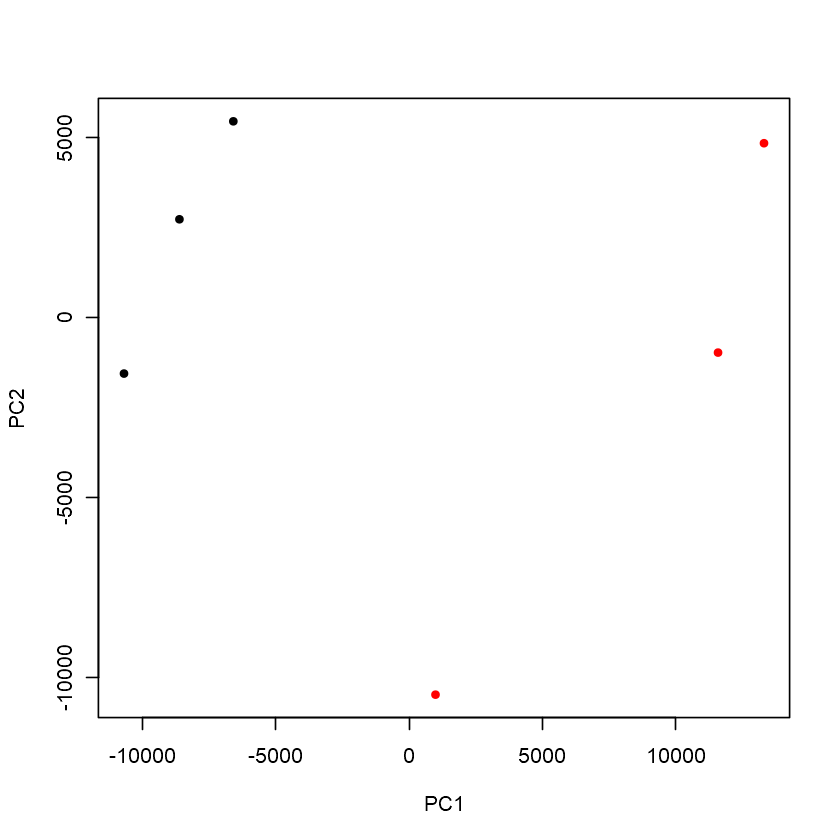

In [12]:
plot(PCD$x, pch = 20, col = as.factor(sampleinfo$Condition))

In [13]:
DES <- DESeqDataSetFromMatrix(counts4DE, sampleinfo, ~ Condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"

In [14]:
DES

class: DESeqDataSet 
dim: 48359 6 
metadata(1): version
assays(1): counts
rownames: NULL
rowData names(0):
colnames(6): Control_1 Control_2 ... Drought_2 Drought_3
colData names(2): SampleName Condition

In [15]:
DES <- DESeq(DES, parallel = T)

estimating size factors
estimating dispersions
gene-wise dispersion estimates: 2 workers
mean-dispersion relationship
final dispersion estimates, fitting model and testing: 2 workers


In [16]:
res <- results(DES, contrast = c("Condition","Control","Drought"))

In [17]:
res

log2 fold change (MLE): Condition Control vs Drought 
Wald test p-value: Condition Control vs Drought 
DataFrame with 48359 rows and 6 columns
               baseMean    log2FoldChange            lfcSE               stat
              <numeric>         <numeric>        <numeric>          <numeric>
1      4.37924095298046 -2.23940742850838 1.14136090073911  -1.96205023937495
2      2.34215179680962 0.989292433352936 1.29785100865074  0.762254239322445
3      2.34215179680962 0.989292433352936 1.29785100865074  0.762254239322445
4      2.34215179680962 0.989292433352936 1.29785100865074  0.762254239322445
5      2.34215179680962 0.989292433352936 1.29785100865074  0.762254239322445
...                 ...               ...              ...                ...
48355 0.139423976003451 0.500546204545085  4.0804728567969   0.12266867642835
48356  5.55540985534414 -2.80210944720915 1.02021395009994  -2.74659001372669
48357  4.99898051573315 -5.03555361230484 1.42721093587286  -3.52824763721782

In [18]:
length(which(!(is.na(res$padj))))

[1] 18376

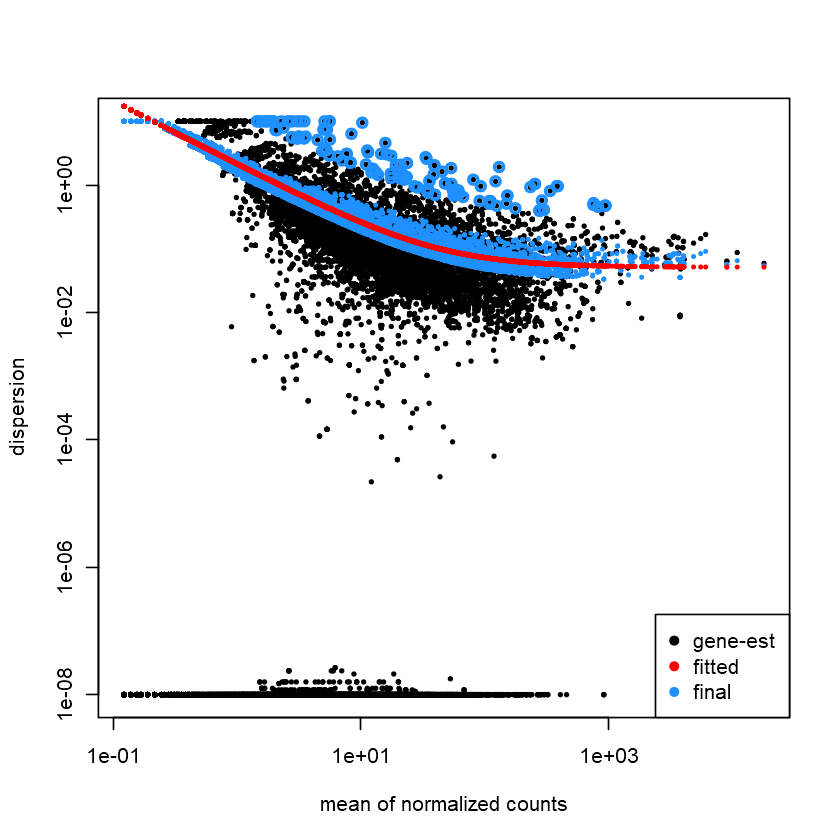

In [19]:
plotDispEsts(DES)

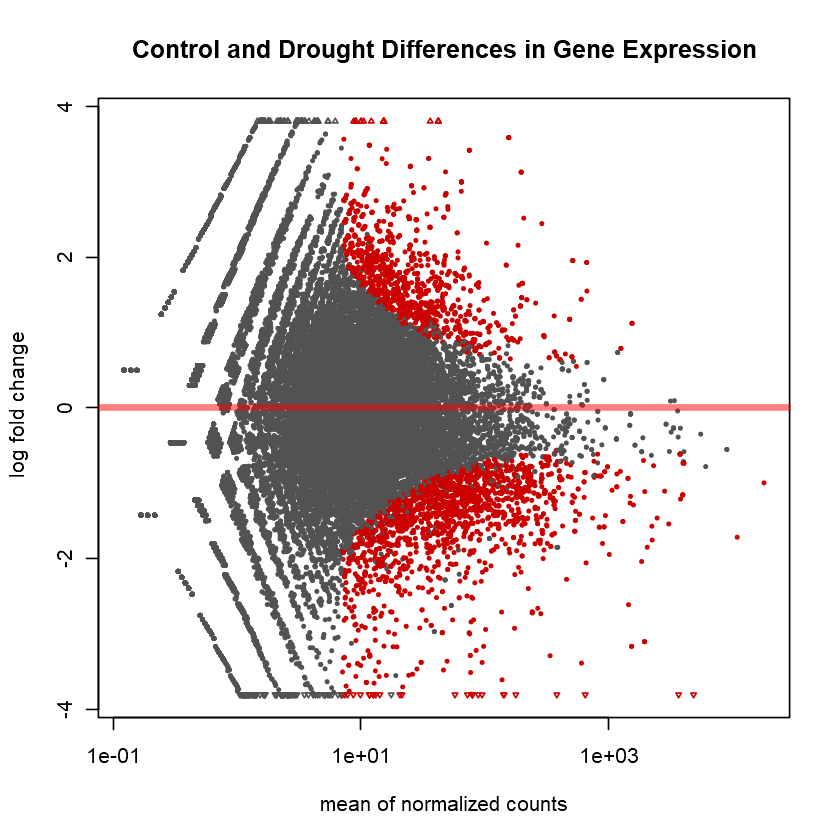

In [20]:
plotMA(res, main = "Control and Drought Differences in Gene Expression")

In [21]:
res <- cbind(counts$Geneid, res)

In [22]:
resordered <- res[order(res$padj),]
head(resordered)

DataFrame with 6 rows and 7 columns
  counts$Geneid         baseMean    log2FoldChange             lfcSE
       <factor>        <numeric>         <numeric>         <numeric>
1   ATCG00430.1 381.044727321652 -4.62297115070582 0.352308676063178
2   ATCG00470.1 3663.27693778103 -3.98621136276849  0.30461986826467
3   ATCG00480.1 4836.71671692959 -4.00141999502682 0.325227444718347
4   ATCG00220.1  143.26542747173 -4.69404814579978 0.388715691609166
5   ATCG00420.1 177.752171073001 -4.26623822535831 0.381459933998957
6   AT1G31580.1 1443.82459473704 -2.60985814643821 0.235715257731456
               stat               pvalue                 padj
          <numeric>            <numeric>            <numeric>
1 -13.1219338744778 2.46561704937085e-39 3.64462660318254e-35
2 -13.0858547916679 3.96672464429967e-39 3.64462660318254e-35
3 -12.3034512001043 8.67851965346525e-35 5.31588257173591e-31
4 -12.0757876440949 1.41799924670291e-33 6.51428853935319e-30
5 -11.1839746330213 4.88519476978942e-29



**_Get rid of all NA adjusted p-values_**

In [23]:
resordered <- resordered[!is.na(resordered$padj),]
dim(resordered)

[1] 18376     7

In [24]:
install.packages("pheatmap", repos = "https://cloud.r-project.org/")

Installing package into 'C:/Users/world/R/win-library/3.5'
(as 'lib' is unspecified)


package 'pheatmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\world\AppData\Local\Temp\RtmpQJvDbg\downloaded_packages


In [25]:
library(pheatmap)

Warning message:
"package 'pheatmap' was built under R version 3.5.3"

In [26]:
dim(counts[which(counts$Geneid %in% resordered$'counts$Geneid'),])

[1] 18376    12

In [27]:
FC <- counts[which(counts$Geneid %in% resordered$'counts$Geneid'),]
dim(FC)

[1] 18376    12

In [28]:
head(FC)

,Geneid,Chr,Start,End,Strand,Length,sub06_qc.bam,sub07_qc.bam,sub08_qc.bam,sub21_qc.bam,sub23_qc.bam,sub24_qc.bam
10,AT1G01040.1,Chr1,23121,31227,+,8107,18,17,24,3,4,5
11,AT1G01040.2,Chr1,23416,31120,+,7705,18,17,23,3,3,4
12,AT1G01050.1,Chr1,31170,33171,-,2002,17,25,15,21,24,32
13,AT1G01050.2,Chr1,31382,33009,-,1628,16,25,13,21,23,31
24,AT1G01080.2,Chr1,45296,47019,-,1724,51,28,26,25,26,22
25,AT1G01080.1,Chr1,44970,47059,-,2090,51,28,26,25,26,22


In [29]:
resordered


DataFrame with 18376 rows and 7 columns
      counts$Geneid         baseMean        log2FoldChange             lfcSE
           <factor>        <numeric>             <numeric>         <numeric>
1       ATCG00430.1 381.044727321652     -4.62297115070582 0.352308676063178
2       ATCG00470.1 3663.27693778103     -3.98621136276849  0.30461986826467
3       ATCG00480.1 4836.71671692959     -4.00141999502682 0.325227444718347
4       ATCG00220.1  143.26542747173     -4.69404814579978 0.388715691609166
5       ATCG00420.1 177.752171073001     -4.26623822535831 0.381459933998957
...             ...              ...                   ...               ...
18372   AT2G44230.1 16.5670941310722  -0.00101610346949357 0.553447739294053
18373   AT3G05090.3  9.4946400655974  -0.00119336118974149 0.690080699930841
18374   AT5G10350.1 20.7419632691027  0.000197515015592597 0.480607508589279
18375   AT1G27695.2 8.94526210953626  0.000127567383421512 0.676225457164992
18376   AT5G11480.1 35.4949195961342

In [30]:
FCf <- counts[which(counts$Geneid %in% resordered[1:25,]$'counts$Geneid'),]
dim(FCf)

[1] 25 12

In [31]:
colnames(FCf)[2:7] <- sampleinfo$SampleName
head(FCf)

,Geneid,Control_1,Control_2,Control_3,Drought_1,Drought_2,Drought_3,sub07_qc.bam,sub08_qc.bam,sub21_qc.bam,sub23_qc.bam,sub24_qc.bam
2104,AT1G10970.2,Chr1,3665087,3667139,-,2053,2,6,16,85,114,303
2105,AT1G10970.1,Chr1,3665201,3666526,-,1326,2,6,14,76,106,285
2661,AT1G13930.1,Chr1,4760957,4761869,+,913,534,427,506,3788,3244,1883
2662,AT1G13930.2,Chr1,4761012,4762666,+,1655,535,427,506,3788,3246,1883
2663,AT1G13930.3,Chr1,4761012,4762666,+,1655,535,427,506,3788,3246,1883
5720,AT1G31580.1,Chr1,11310997,11311989,+,993,421,413,653,2202,1753,2620


In [32]:
rownames(FCf) <- FCf$Geneid

In [34]:
ScaledCounts <- t(scale(t(FCf[,7:12]), scale = T))

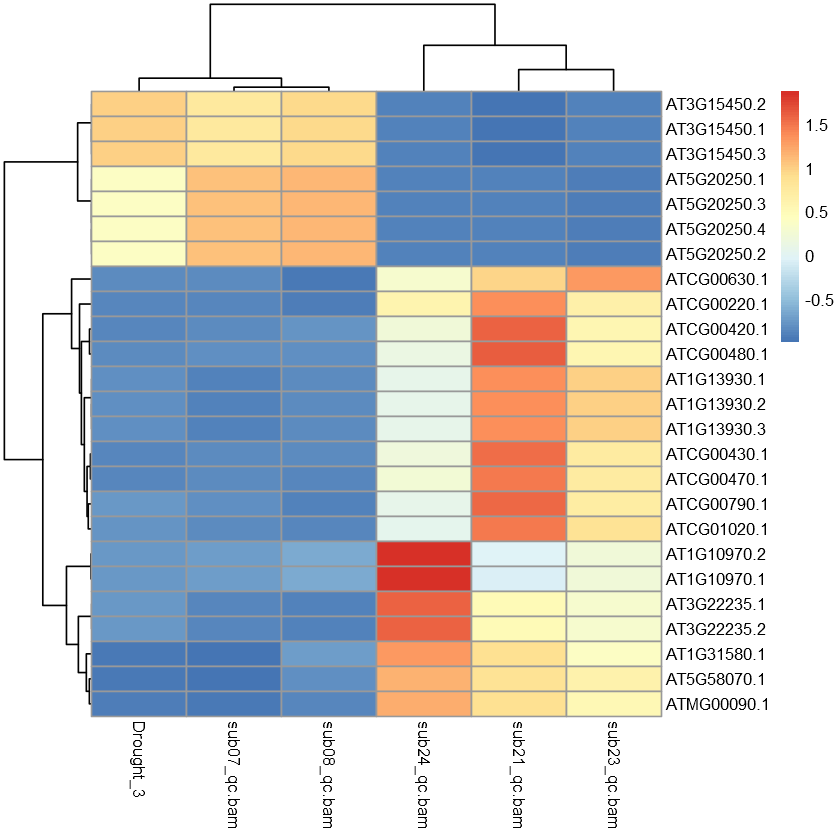

In [35]:
pheatmap(ScaledCounts)